In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from datasets import load_dataset

ds = load_dataset("abisee/cnn_dailymail", "1.0.0")

C:\Users\ali\anaconda3\envs\my_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


In [4]:
train_df = pd.DataFrame(ds['train'])
validation_df = pd.DataFrame(ds['validation'])
test_df = pd.DataFrame(ds['test'])

In [5]:
train_df.head()

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article     287113 non-null  object
 1   highlights  287113 non-null  object
 2   id          287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


In [5]:
train_df['article_len']=train_df['article'].apply(len)
train_df['highlights_len']=train_df['highlights'].apply(len)
train_df.head()

,article,highlights,id,article_len,highlights_len
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4,2527,217
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9,4051,281
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37,3940,224
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88,2620,185
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a,5764,273


C:\Users\ali\AppData\Local\Temp\ipykernel_9952\2734713289.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['article_len'])


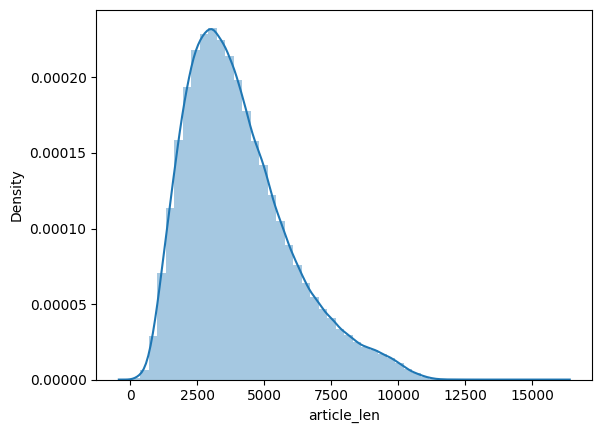

In [43]:
sns.distplot(train_df['article_len'])
plt.show()

C:\Users\ali\AppData\Local\Temp\ipykernel_9952\2776627221.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['highlights_len'])


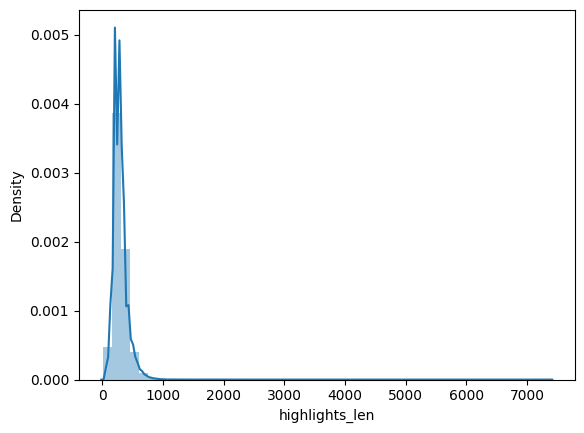

In [17]:
sns.distplot(train_df['highlights_len'])
plt.show()

In [30]:
news_id = '42c027e4ff9730fbb3de84c1af0d2c506e41c3e4'
news_row = train_df[train_df['id'] == news_id]
if not news_row.empty:
    full_text = news_row['article'].values[0]
    print(full_text)
else:
    print("خبر مورد نظر یافت نشد.")

LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details of how

In [34]:
news_id = '42c027e4ff9730fbb3de84c1af0d2c506e41c3e4'
news_row = train_df[train_df['id'] == news_id]
if not news_row.empty:
    highlight = news_row['highlights'].values[0]
    print(highlight)
else:
    print("تیتر مورد نظر یافت نشد.")

Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday . Young actor says he has no plans to fritter his cash away . Radcliffe's earnings from first five Potter films have been held in trust fund .


In [6]:
train_df['text'] = train_df['highlights'] + " " + train_df['article']
validation_df['text'] = validation_df['highlights'] + " " + validation_df['article']
test_df['text'] = test_df['highlights'] + " " + test_df['article']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
train_df.head()

,article,highlights,id,article_len,highlights_len,text
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4,2527,217,Harry Potter star Daniel Radcliffe gets £20M f...
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9,4051,281,Mentally ill inmates in Miami are housed on th...
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37,3940,224,"NEW: ""I thought I was going to die,"" driver sa..."
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88,2620,185,"Five small polyps found during procedure; ""non..."
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a,5764,273,"NEW: NFL chief, Atlanta Falcons owner critical..."


In [8]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train = vectorizer.fit_transform(train_df['text'])
X_validation = vectorizer.transform(validation_df['text'])
X_test = vectorizer.transform(test_df['text'])

In [9]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=5, random_state=42)

In [10]:
train_clusters = kmeans.predict(X_train)

In [11]:
validation_clusters = kmeans.predict(X_validation)
silhouette_avg = silhouette_score(X_validation, validation_clusters)
print(f'Silhouette Score for Validation Set: {silhouette_avg}')

Silhouette Score for Validation Set: 0.005951182570277676


In [12]:
test_clusters = kmeans.predict(X_test)

In [13]:
test_df['predicted_category'] = test_clusters

In [14]:
test_df.to_csv('path_to_save_test_predictions.csv', index=False)

In [15]:
import pickle

In [17]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [18]:
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [21]:
from flask import Flask, request, jsonify

In [22]:
with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('kmeans_model.pkl', 'rb') as f:
    kmeans_model = pickle.load(f)

In [24]:
app = Flask(__name__)
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    text = data['text']
    
    features = tfidf_vectorizer.transform([text])
    
    predicted_cluster = kmeans_model.predict(features)
    
    return jsonify({'predicted_category': int(predicted_cluster[0])})

In [25]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\ali\anaconda3\envs\my_env\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
